## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

C:\Users\shanup\anaconda3\envs\rl_env\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


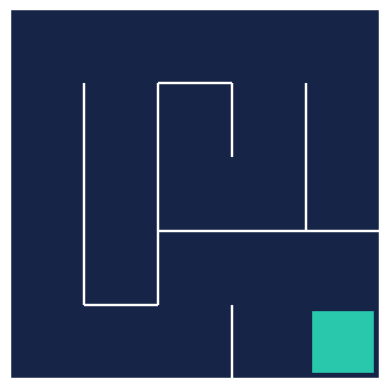

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [5]:
action_values = np.zeros(shape=(5, 5, 4))

#### Plot $Q(s, a)$

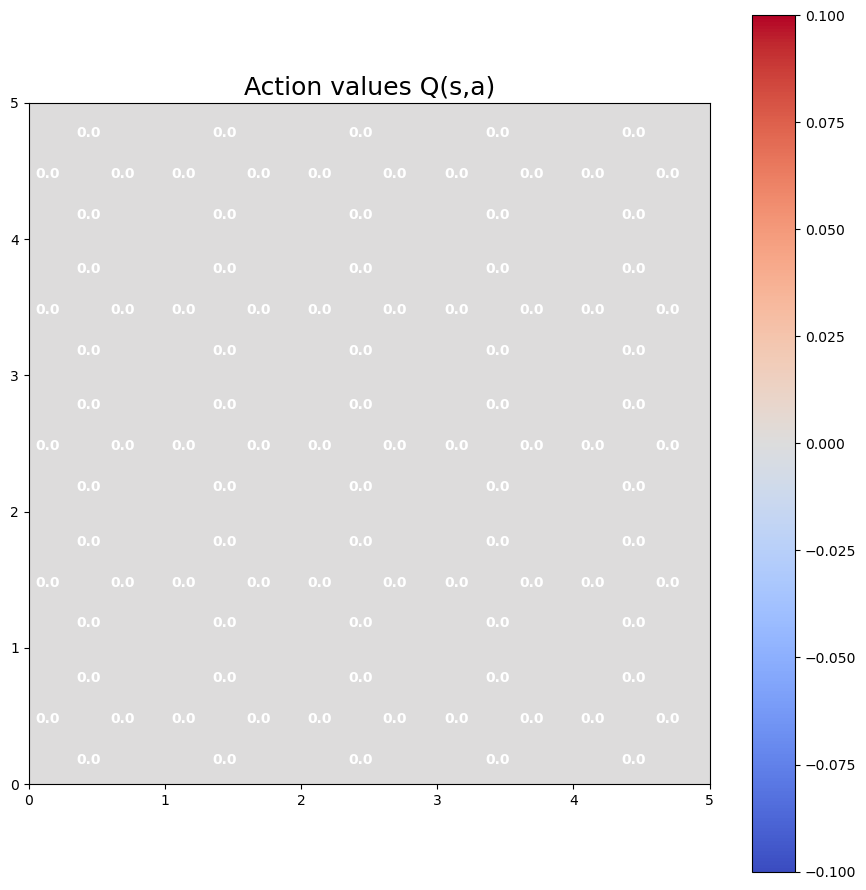

In [6]:
plot_action_values(action_values)

## Define the policy $\pi(s)$

#### Create the policy $\pi(s)$

In [7]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

#### Test the policy with state (0, 0)

In [8]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 1


#### Plot the policy

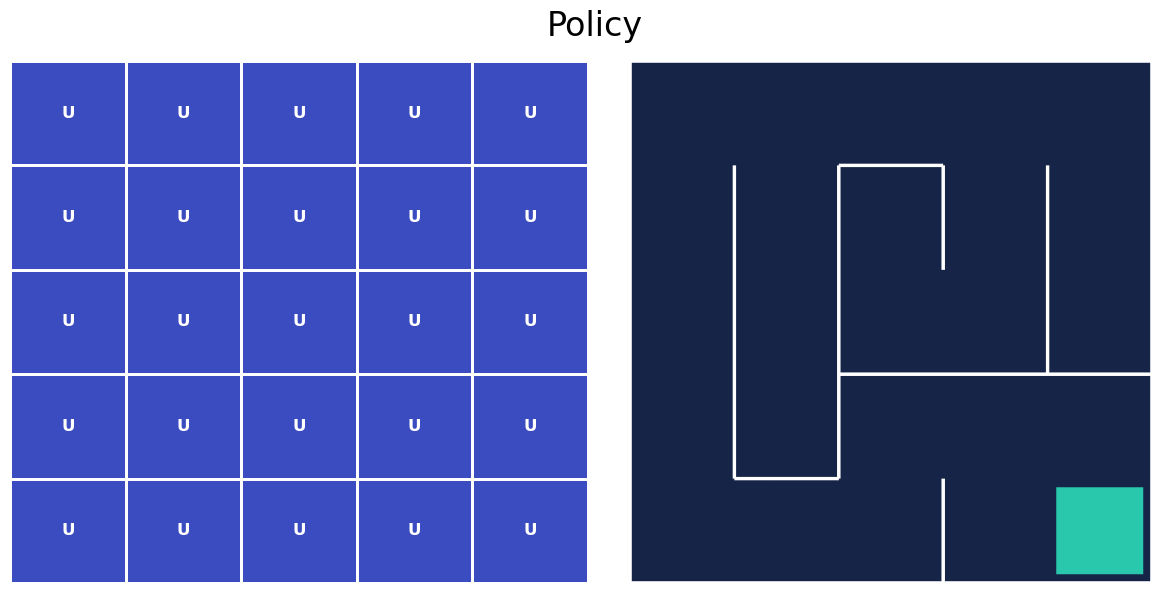

In [9]:
plot_policy(action_values, frame)

## Implement the algorithm


</br></br></br>

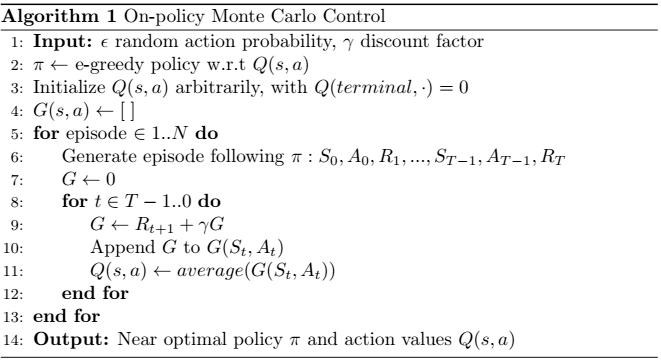


<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [10]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    
    sa_returns = {}
    
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            #print(state)
            state = next_state
            #print(transitions)
        
        G = 0
        print("")
        print("")
        for state_t, action_t, reward_t in reversed(transitions):
            print(state_t, action_t, reward_t)
            G = reward_t + gamma * G
            
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])
            

In [11]:
on_policy_mc_control(policy, action_values, episodes=10000)



(3, 4) 2 -1.0
(3, 4) 1 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 1) 2 -1.0
(4, 2) 3 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(1, 0) 1 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(1, 0) 0 -1.0
(2, 0) 0 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(1, 0) 1 -1.0
(1, 0) 3 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(1, 0) 0 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(2, 0) 0 -1.0
(3, 0) 0 -1.0
(3, 0) 3 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(3, 0) 1 -1.0
(3, 0) 3 -1.0
(3, 0) 1 -1.0
(3, 0) 3 -1.0
(3, 0) 1 -1.0
(4, 0) 0 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 1) 3 -1.0
(4, 1) 2 -1.0
(4, 1) 0 -1.0
(4, 1) 0 -1.0
(4, 1) 0 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 2) 3 -1.0
(4, 

(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 0 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4

(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -

(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2

(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2



(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(4, 3) 0

(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 2) 3 -1.0
(0, 2) 2 -1.0
(0, 1) 1 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1

(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 1) 3 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -

(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(3, 4) 2



(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 4)



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(3, 0) 1 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2

(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2

(0, 1) 3 -1.0
(0, 0) 1 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(1, 0) 3 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1



(3, 4) 2 -1.0
(3, 3) 1 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2

(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 4) 3 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -

(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2

(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3)

(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2

(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -

(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -

(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(4, 3) 0

(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -

(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(3, 0) 3 -1.0
(3, 0) 3 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2

(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -

(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3)

(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -

(4, 2) 1 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1

(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -

(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2

(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(1, 0) 1

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -

(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1



(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(3, 4) 2 -1.0
(3, 4) 1 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -

(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2

(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2

(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 4) 0 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0

(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(3, 4) 2 -1.0
(3, 4) 1 -1.0
(3, 3) 1 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -

(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -

(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 2) 3 -1.0
(0, 1) 1 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0

(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2

(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1

(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1

(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(3, 4) 2 -1.0
(3, 4) 0 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2

(0, 1) 3 -1.0
(0, 2) 3 -1.0
(0, 1) 1 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2

(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -

(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0

(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3)

(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0)

(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2

(3, 0) 1 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 1) 2 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -

(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1

(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2

(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -

(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0
(0, 0) 3 -1.0
(0, 0) 3 -1.0
(0, 0) 0 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -

(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1

(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2

(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(4, 0) 0 -

(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -

(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -

(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2

(4, 3) 0 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(4, 1) 3 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1)

(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 4) 3 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3



(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2

(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2

(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(3, 4) 2 -1.0
(3, 4) 1 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -

(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1

(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -

(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1

(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1

(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(4, 0) 0 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -

(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(3, 2) 2 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -

(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0

(4, 3) 0 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(3, 2) 0 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -

(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 1) 2

(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 1 -1.0
(4, 2) 1 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2

(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 4) 3 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -

(1, 0) 2 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(4, 3) 0 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 2) 2 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 0) 3 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -

(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(4, 0) 2 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(4, 1) 3 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 3) 0 -1.0
(3, 2) 1 -1.0
(4, 2) 0

(4, 0) 0 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 3 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 0 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 2) 3 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 1) 2



(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 3 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 3 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1)

(1, 0) 2 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0
(0, 0) 3 -1.0
(0, 1) 3 -1.0
(0, 0) 1 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(3, 0) 1 -1.0
(2, 0) 2 -1.0
(2, 0) 1 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 1) 2 -1.0
(4, 1) 0 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3 -1.0
(1, 0) 3 -1.0
(1, 0) 1 -1.0
(2, 0) 0 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(3, 4) 2 -1.0
(3, 3) 1 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(4, 3) 2 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0

(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 1 -1.0
(1, 0) 1 -1.0
(0, 0) 2 -1.0
(1, 0) 0 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(3, 2) 2 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(1, 0) 3

(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(2, 0) 0 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(3, 3) 3 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 2) 3 -1.0
(4, 2) 2 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -1.0
(0, 0) 2 -1.0


(4, 3) 1 -1.0
(3, 3) 2 -1.0
(3, 2) 1 -1.0
(4, 2) 0 -1.0
(4, 1) 1 -1.0
(4, 0) 1 -1.0
(3, 0) 2 -1.0
(2, 0) 2 -1.0
(3, 0) 0 -1.0
(2, 0) 2 -1.0
(1, 0) 2 -

## Show results

#### Show resulting value table $Q(s, a)$

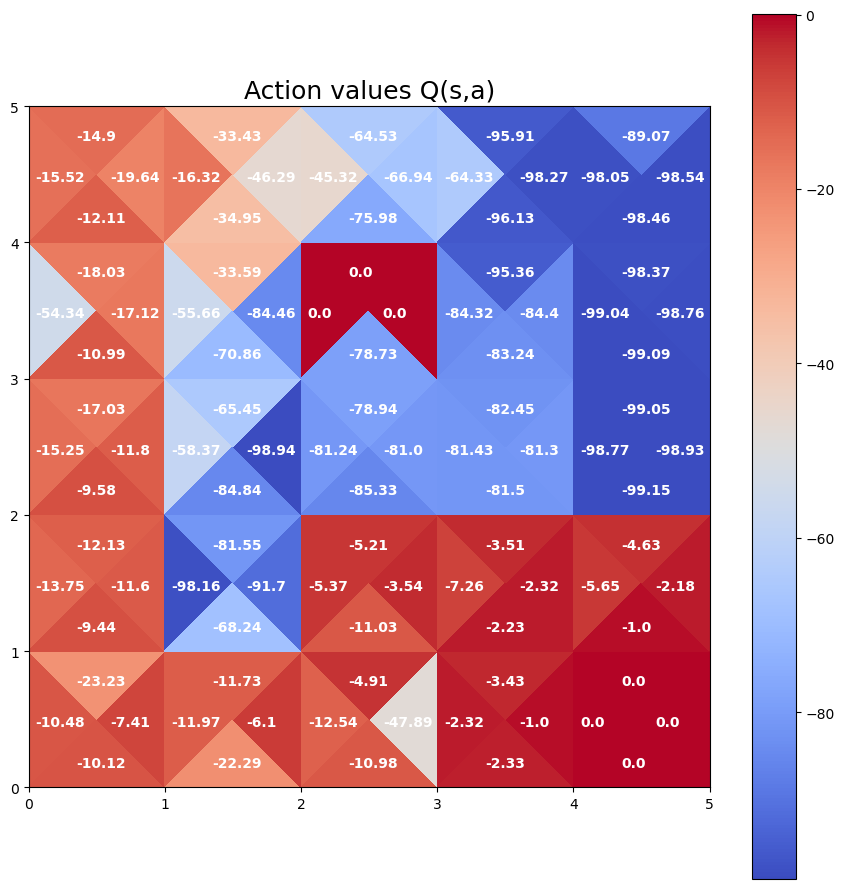

In [12]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

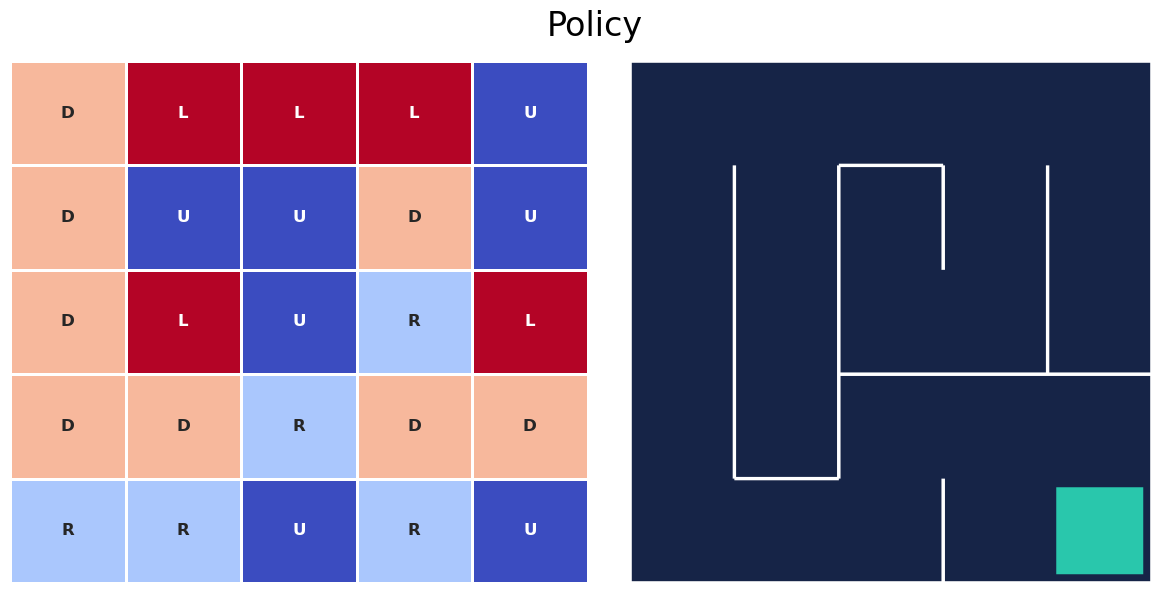

In [13]:
plot_policy(action_values, frame)

#### Test the resulting agent

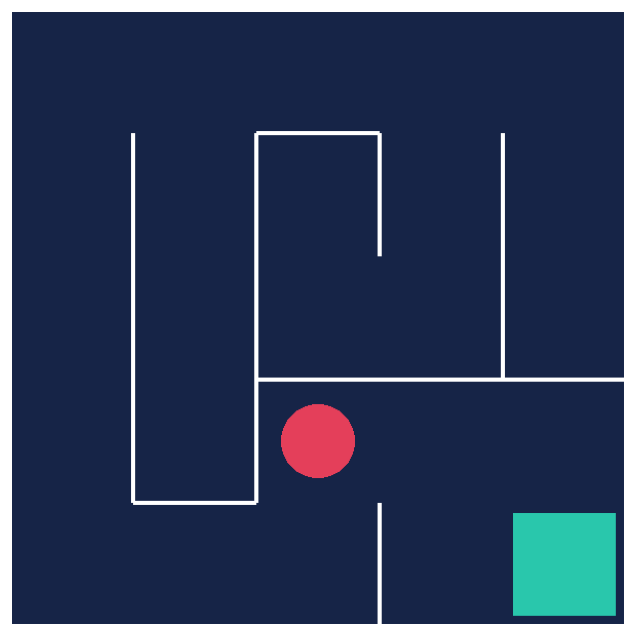

In [ ]:
test_agent(env, policy)